In [1]:
import IO
import numpy as np
import matplotlib.pyplot as plt
import file_path
%matplotlib inline
DOWN, UP=0,1

2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


#### Triangular Lattice
reference : Temperature Dependence of the Magnetic Susceptibility for Triangular-Lattice
Antiferromagnets with spatially anisotropic exchange constants,
Weihong Zheng, Rajiv R. P. Singh, Ross H. McKenzie, and Radu Coldea

\begin{equation}
\chi_u = \beta \sum_{n=0} (\beta J)^n \frac{1}{4^{(n+1)} n!} \sum_{m=0}^n c_{m,n} 
\end{equation}

In [2]:
##c(m,n)
c_mat = np.zeros((11, 11))
c_mat[0, 0]= 1 
c_mat[3, 5]= -7680 
c_mat[7, 7]= 20480
c_mat[7, 9]= -129328128
c_mat[0, 1]=-4
c_mat[4, 5]= 1920 
c_mat[0, 8]= 4205056
c_mat[8, 9]= -159694848
c_mat[1, 1]= -2 
c_mat[5, 5]= -672 
c_mat[1, 8]= -58877952
c_mat[9, 9]= 19133440
c_mat[0, 2]= 16
c_mat[0, 6]= 23488 
c_mat[2, 8]= 110985216
c_mat[0,10]= -2574439424
c_mat[1, 2]= 32 
c_mat[1, 6]= 293376
c_mat[3, 8]= -501760
c_mat[1,10]= 52032471040
c_mat[0, 3]= -64 
c_mat[ 2, 6]= 111552
c_mat[4, 8]= 101972480 
c_mat[2,10]= -735774720
c_mat[1, 3]= -264
c_mat[3, 6]= 411392 
c_mat[5, 8]= -84013056 
c_mat[3,10]= -29924454400
c_mat[2, 3]= -96 
c_mat[4, 6]= -115968 
c_mat[6, 8]= 29817856
c_mat[4,10]= 15318384640
c_mat[3, 3]= 16 
c_mat[5, 6]= 70656 
c_mat[7, 8]= -15618048
c_mat[5,10]= 38033190912
c_mat[0, 4]= 416 
c_mat[6, 6]= -12768
c_mat[8, 8]= 2923776
c_mat[6,10]= -40192143360
c_mat[1, 4]= 1216 
c_mat[0, 7]= 207616 
c_mat[0, 9]= -198295552 
c_mat[ 7,10]= 48646737920
c_mat[2, 4]= 2400
c_mat[1, 7]= -1766016
c_mat[1, 9]= -571327488
c_mat[ 8,10]= -13533921280
c_mat[ 3, 4]= -512
c_mat[2, 7]= -7739648 
c_mat[2, 9]= 3934844928
c_mat[9,10]= 4594278400
c_mat[ 4, 4]= 80 
c_mat[3, 7]= -1804992
c_mat[3, 9]= -4115195904 
c_mat[10,10]= -869608960
c_mat[ 0, 5]= -4544
c_mat[ 4, 7]= -3373440
c_mat[4, 9]= 3772164096
c_mat[1, 5]= -10880 
c_mat[5, 7]= 689920 
c_mat[ 5, 9]= -1888413696
c_mat[2, 5]= -20480 
c_mat[6, 7]= 120064 
c_mat[6, 9]= 1134317568

In [3]:
def factorial(n):
    if n < 0 or n > 10:
        print "Not Implemented!"
        return  
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

In [4]:
def triangular_HTE(beta, order):
    if order > 10:
        print "Not Implemented!"
        return

    terms = np.zeros(11)
    for n in range(order+1):
        terms[n] = 3.0* beta**n/(4.0**(n+1)*factorial(n)) * np.sum(c_mat[0:n+1, n])
    return np.sum(beta*terms[0:order+1])

In [5]:
triangular_HTE(0.8, 9)

0.23174553242412702

In [6]:
for i in range(0, 11):
    print triangular_HTE(1.0, i)

0.75
-0.375
0.75
-0.046875
0.392578125
0.1341796875
0.332983398437
0.209041922433
0.234840393066
0.24901781839
0.262971833547


In [7]:
T_list = np.linspace(0.5, 2.0, 100)
HTE_list = np.zeros((10, len(T_list)))

In [8]:
for t in range(len(T_list)):
    for i in range(10):
        order = i + 1
        HTE_list[i,t] = triangular_HTE(1.0/T_list[t], order)

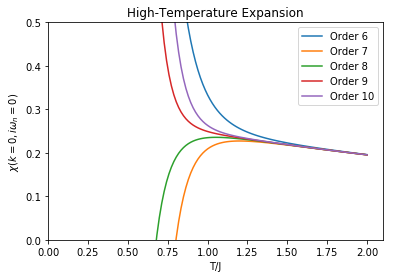

In [9]:
plt.figure()
for i in range(5, 10):
    plt.plot(T_list, HTE_list[i], label="Order "+str(i+1))
#y=[0.0937,]*MaxTauBin
#plt.plot(TGrid, y, 'k--', label="Unbiased MC")
plt.ylim([0.0, 0.5])
plt.xlim([0.0, 2.1])
plt.xlabel("T/J")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.legend()
plt.title("High-Temperature Expansion")

plt.savefig("triangular_High-Temperature.pdf")
plt.show()

In [10]:
def read_data(filename):
    data = IO.LoadBigDict(filename)
    if 'GammaG' in data:
        rGammaG = np.array(data["GammaG"]["SmoothT"])
    elif 'GGGammaG' in data:
        rGammaG = np.array(data["GGGammaG"]["SmoothT"])    
    Chi = np.array(data["Chi"]["SmoothT"])[0,0,0,0,:,:]
    BKChi = None
    if "BKChi" in data:
        BKChi = np.array(data["BKChi"]["SmoothT"])[0,0,0,0,:,:]
    return (rGammaG, Chi, BKChi)

In [11]:
def get_static_uniform_chi(data, beta):
    avg=beta*np.average(np.sum(data.real,axis=0))
    return avg

In [12]:
def get_energy(data, beta):
    return data[1, 0].real*2

In [13]:
def get_error(data, order):
    error = 0.0
    if order > 1:
        unif = np.sum(data.real, axis=0)
        error = np.max(unif) - np.min(unif)
    return error + 0.0002

In [14]:
def get_chi00(data):
    return data[0, 0].real

In [15]:
def get_chi0(data):
    return data[0, :].real

In [16]:
rGammaG = {}
Chi = {}
BKChi = {}
DiagMC_triangular = {}
CDMC_triangular = {}
HTE_triangular = {}

In [17]:
beta = 0.8
n_order = 5

In [18]:
for i in range(1, n_order+1):
    print file_path.path("triangular", beta, i)
    rGammaG[(beta, i)], Chi[(beta, i)], BKChi[(beta, i)] = read_data(file_path.path("triangular", beta, i))

/mnt/data/GammaBK_triangular/Gamma_BK/Beta0.8/Beta0.8_Order1/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta0.8/Beta0.8_Order2/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta0.8/Beta0.8_Order3/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta0.8/Beta0.8_Order4/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta0.8/Beta0.8_Order5/Weight


In [19]:
Chi00_DMC = {}
Chi00_DMC[beta] = np.zeros((n_order, 3))
Chi00_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_DMC[beta][i-1,1] = get_chi00(Chi[(beta, i)])
    Chi00_DMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i) 
    
Chi00_CDMC = {}
Chi00_CDMC[beta] = np.zeros((n_order, 3))
Chi00_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_CDMC[beta][i-1,1] = 3.0*get_chi00(BKChi[(beta, i)])
    Chi00_CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

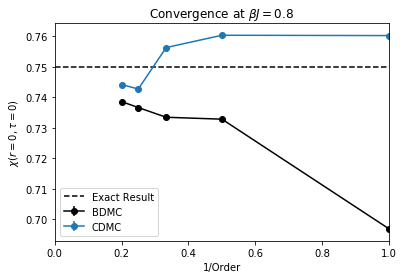

In [20]:
plt.figure()
plt.errorbar(1.0/Chi00_DMC[beta][:,0], Chi00_DMC[beta][:, 1], yerr=Chi00_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Chi00_CDMC[beta][:,0], Chi00_CDMC[beta][:, 1], yerr=Chi00_CDMC[beta][:,2], label="CDMC",fmt='o-')
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(r=0, \tau=0)$")
plt.title(r"Convergence at $\beta J = 0.8$")
plt.legend()

plt.savefig("triangular_Sum_Rule_Beta0.8.pdf")
plt.show()

In [21]:
Chi0_DMC = {}
Chi0_DMC[beta] = []
for i in range(1, n_order+1):
    Chi0_DMC[beta].append(get_chi0(Chi[(beta, i)]))
    
Chi0_CDMC = {}
Chi0_CDMC[beta] = []
for i in range(1, n_order+1):
    Chi0_CDMC[beta].append(3.0*get_chi0(BKChi[(beta, i)]))

Tau = {}
Tau[beta] = (np.array(range(len(Chi0_DMC[beta][0])))+0.5)*beta/len(Chi0_DMC[beta][0])

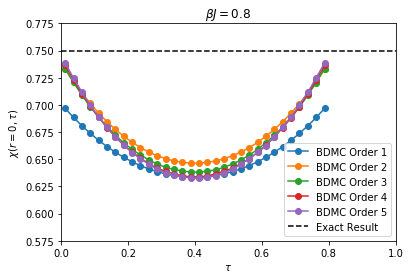

In [23]:
plt.figure()
for i in range(0, 5):
    plt.plot(Tau[beta], Chi0_DMC[beta][i], 'o-', label="BDMC Order {}".format(i+1))
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
plt.ylim([0.575, 0.775])
plt.xlim([0,1])
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\chi(r=0, \tau)$")
plt.title(r"$\beta J = 0.8$")
plt.legend()
plt.savefig("triangular_chi0_Beta0.8.pdf")
plt.show()

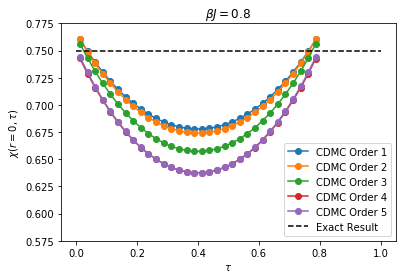

In [24]:
plt.figure()
for i in range(0, 5):
    plt.plot(Tau[beta], Chi0_CDMC[beta][i], 'o-', label="CDMC Order {}".format(i+1))
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
plt.ylim([0.575, 0.775])
#plt.xlim([0.4,0.6])
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\chi(r=0, \tau)$")
plt.title(r"$\beta J = 0.8$")
plt.legend()
plt.savefig("triangular_chi0_Beta0.8_CDMC.pdf")
plt.show()

In [25]:
beta = 1.0
n_order = 5

In [26]:
for i in range(1, n_order+1):
    print file_path.path("triangular", beta, i)
    rGammaG[(beta, i)], Chi[(beta, i)], BKChi[(beta, i)] = read_data(file_path.path("triangular", beta, i))

/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.0/Beta1.0_Order1/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.0/Beta1.0_Order2/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.0/Beta1.0_Order3/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.0/Beta1.0_Order4/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.0/Beta1.0_Order5/Weight


In [27]:
DiagMC_triangular[beta] = np.zeros((n_order, 3))
DiagMC_triangular[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    DiagMC_triangular[beta][i-1,1] = get_static_uniform_chi(Chi[(beta, i)], beta)
    DiagMC_triangular[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)  

In [28]:
HTE_Order = np.array(range(1, 11))
HTE_triangular[beta] = np.array([triangular_HTE(beta, order) for order in HTE_Order])

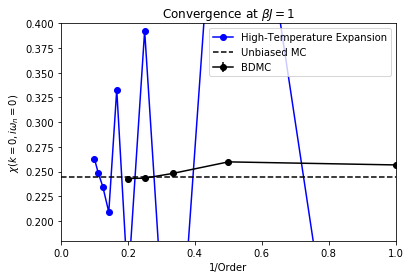

In [30]:
plt.figure()
plt.errorbar(1.0/DiagMC_triangular[beta][:,0], DiagMC_triangular[beta][:, 1], yerr=DiagMC_triangular[beta][:,2], 
             c="k", label="BDMC",fmt='o-')
plt.plot(1.0/HTE_Order, HTE_triangular[beta],'o-', c='b', label="High-Temperature Expansion")
y=[0.0814*3]*2
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
plt.ylim([0.18, 0.4])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J = 1$")
plt.legend()
plt.savefig("triangular_Convergence_Beta1.pdf")
plt.show()

In [31]:
CDMC_triangular[beta] = np.zeros((n_order, 3))
CDMC_triangular[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    CDMC_triangular[beta][i-1,1] = 3.0*get_static_uniform_chi(BKChi[(beta, i)], beta)
    CDMC_triangular[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)  

In [32]:
print CDMC_triangular[1.0]

[[  1.00000000e+00   2.54655885e-01   6.00000000e-04]
 [  2.00000000e+00   2.55052037e-01   7.20719455e-04]
 [  3.00000000e+00   2.46371414e-01   7.56780843e-04]
 [  4.00000000e+00   2.45307542e-01   9.75738796e-04]
 [  5.00000000e+00   2.44633686e-01   1.11782851e-03]]


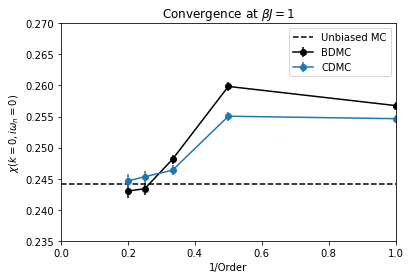

In [35]:
plt.figure()
plt.errorbar(1.0/DiagMC_triangular[beta][:,0], DiagMC_triangular[beta][:, 1], yerr=DiagMC_triangular[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/CDMC_triangular[beta][:,0], CDMC_triangular[beta][:, 1], yerr=CDMC_triangular[beta][:,2], label="CDMC",fmt='o-')
#plt.plot(1.0/HTE_Order, HTE_triangular,'o-', c='b', label="High-Temperature Expansion")
y=[0.0814*3]*2
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
plt.ylim([0.235, 0.27])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J = 1$")
plt.legend()

plt.savefig("triangular_Convergence_Beta1_with_CDMC.pdf")
plt.show()

In [34]:
Energy_DMC = {}
Energy_DMC[beta] = np.zeros((n_order, 3))
Energy_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_DMC[beta][i-1,1] = get_energy(Chi[(beta, i)], beta)
    Energy_DMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i) 

Energy_CDMC = {}
Energy_CDMC[beta] = np.zeros((n_order, 3))
Energy_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_CDMC[beta][i-1,1] = 3.0*get_energy(BKChi[(beta, i)], beta)
    Energy_CDMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i)

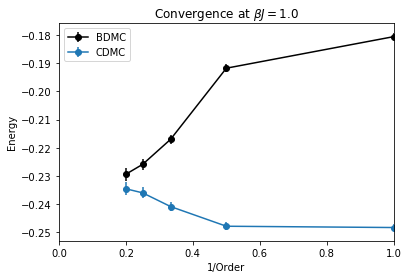

In [36]:
plt.figure()
plt.errorbar(1.0/Energy_DMC[beta][:,0], Energy_DMC[beta][:, 1], yerr=Energy_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Energy_CDMC[beta][:,0], Energy_CDMC[beta][:, 1], yerr=Energy_CDMC[beta][:,2], label="CDMC",fmt='o-')
#y=[-0.3880]*2
#plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel("Energy")
plt.title(r"Convergence at $\beta J = 1.0$")
plt.legend()

plt.savefig("triangular_Energy_Beta1_with_CDMC.pdf")
plt.show()

In [37]:
Chi00_DMC = {}
Chi00_DMC[beta] = np.zeros((n_order, 3))
Chi00_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_DMC[beta][i-1,1] = get_chi00(Chi[(beta, i)])
    Chi00_DMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i) 
    
Chi00_CDMC = {}
Chi00_CDMC[beta] = np.zeros((n_order, 3))
Chi00_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_CDMC[beta][i-1,1] = 3.0*get_chi00(BKChi[(beta, i)])
    Chi00_CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

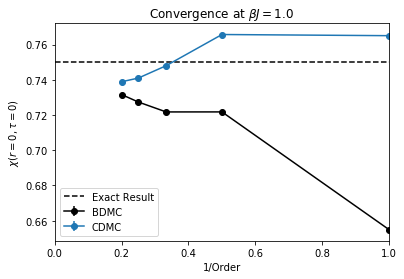

In [38]:
plt.figure()
plt.errorbar(1.0/Chi00_DMC[beta][:,0], Chi00_DMC[beta][:, 1], yerr=Chi00_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Chi00_CDMC[beta][:,0], Chi00_CDMC[beta][:, 1], yerr=Chi00_CDMC[beta][:,2], label="CDMC",fmt='o-')
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(r=0, \tau=0)$")
plt.title(r"Convergence at $\beta J = 1.0$")
plt.legend()

plt.savefig("triangular_Sum_Rule_Beta1.pdf")
plt.show()

In [39]:
Chi0_DMC = {}
Chi0_DMC[beta] = []
for i in range(1, n_order+1):
    Chi0_DMC[beta].append(get_chi0(Chi[(beta, i)]))
    
Chi0_CDMC = {}
Chi0_CDMC[beta] = []
for i in range(1, n_order+1):
    Chi0_CDMC[beta].append(3.0*get_chi0(BKChi[(beta, i)]))

Tau = {}
Tau[beta] = (np.array(range(len(Chi0_DMC[beta][0])))+0.5)*beta/len(Chi0_DMC[beta][0])

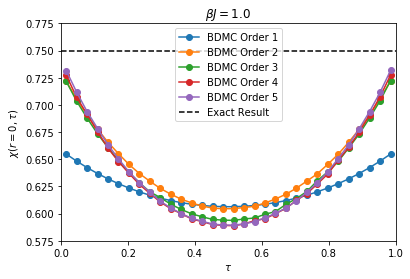

In [40]:
plt.figure()
for i in range(0, 5):
    plt.plot(Tau[beta], Chi0_DMC[beta][i], 'o-', label="BDMC Order {}".format(i+1))
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
plt.ylim([0.575, 0.775])
plt.xlim([0,1])
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\chi(r=0, \tau)$")
plt.title(r"$\beta J = 1.0$")
plt.legend()
plt.savefig("triangular_chi0_Beta1.pdf")
plt.show()

In [41]:
print Chi0_CDMC[beta][4]

[ 0.73886291  0.71898456  0.70093592  0.68467967  0.67004185  0.65691961
  0.64524684  0.63493908  0.62591094  0.61808214  0.6114979   0.6061131
  0.60184939  0.59872061  0.59661833  0.59551307  0.59547161  0.59650052
  0.59864718  0.60182409  0.60606725  0.61143327  0.61796548  0.62573247
  0.63475544  0.64509991  0.65679896  0.66995108  0.68467922  0.70100451
  0.71902286  0.73886317]


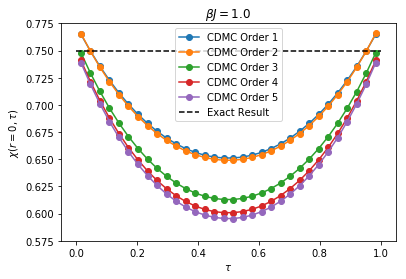

In [42]:
plt.figure()
for i in range(0, 5):
    plt.plot(Tau[beta], Chi0_CDMC[beta][i], 'o-', label="CDMC Order {}".format(i+1))
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
plt.ylim([0.575, 0.775])
#plt.xlim([0.4,0.6])
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\chi(r=0, \tau)$")
plt.title(r"$\beta J = 1.0$")
plt.legend()
plt.savefig("triangular_chi0_Beta1_CDMC.pdf")
plt.show()

In [43]:
beta = 1.5
n_order = 5

In [44]:
for i in range(1, n_order+1):
    print file_path.path("triangular", beta, i)
    rGammaG[(beta, i)], Chi[(beta, i)], BKChi[(beta, i)] = read_data(file_path.path("triangular", beta, i))

/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.5/Beta1.5_Order1/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.5/Beta1.5_Order2/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.5/Beta1.5_Order3/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.5/Beta1.5_Order4/Weight
/mnt/data/GammaBK_triangular/Gamma_BK/Beta1.5/Beta1.5_Order5/Weight


In [45]:
DiagMC_triangular[beta] = np.zeros((n_order, 3))
DiagMC_triangular[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    DiagMC_triangular[beta][i-1,1] = get_static_uniform_chi(Chi[(beta, i)], beta)
    DiagMC_triangular[beta][i-1,2] = get_error(BKChi[(beta, i)], i)  

In [46]:
CDMC_triangular[beta] = np.zeros((n_order, 3))
CDMC_triangular[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    CDMC_triangular[beta][i-1,1] = 3.0*get_static_uniform_chi(BKChi[(beta, i)], beta)
    CDMC_triangular[beta][i-1,2] = get_error(BKChi[(beta, i)], i)  

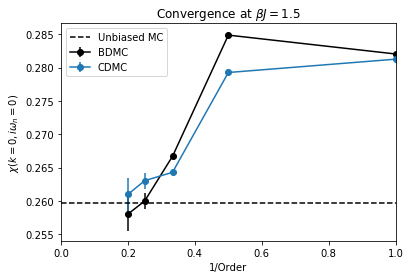

In [47]:
plt.figure()
plt.errorbar(1.0/DiagMC_triangular[beta][:,0], DiagMC_triangular[beta][:, 1], yerr=DiagMC_triangular[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/CDMC_triangular[beta][:,0], CDMC_triangular[beta][:, 1], yerr=CDMC_triangular[beta][:,2], label="CDMC",fmt='o-')
#plt.plot(1.0/HTE_Order, HTE_triangular,'o-', c='b', label="High-Temperature Expansion")
y=[0.08655*3]*2
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.235, 0.27])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J = 1.5$")
plt.legend()

plt.savefig("triangular_Convergence_Beta1.5_with_CDMC.pdf")
plt.show()

In [48]:
Energy_DMC = {}
Energy_DMC[beta] = np.zeros((n_order, 3))
Energy_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_DMC[beta][i-1,1] = get_energy(Chi[(beta, i)], beta)
    Energy_DMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i) 

Energy_CDMC = {}
Energy_CDMC[beta] = np.zeros((n_order, 3))
Energy_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_CDMC[beta][i-1,1] = 3.0*get_energy(BKChi[(beta, i)], beta)
    Energy_CDMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i)

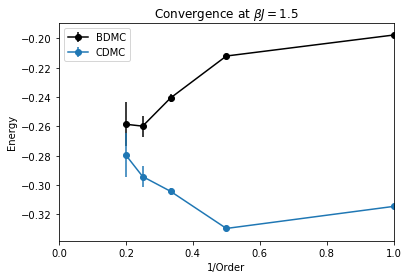

In [49]:
plt.figure()
plt.errorbar(1.0/Energy_DMC[beta][:,0], Energy_DMC[beta][:, 1], yerr=Energy_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Energy_CDMC[beta][:,0], Energy_CDMC[beta][:, 1], yerr=Energy_CDMC[beta][:,2], label="CDMC",fmt='o-')
#y=[-0.3880]*2
#plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel("Energy")
plt.title(r"Convergence at $\beta J = 1.5$")
plt.legend()

plt.savefig("triangular_Energy_Beta1.5_with_CDMC.pdf")
plt.show()

In [50]:
Chi00_DMC = {}
Chi00_DMC[beta] = np.zeros((n_order, 3))
Chi00_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_DMC[beta][i-1,1] = get_chi00(Chi[(beta, i)])
    Chi00_DMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i) 
    
Chi00_CDMC = {}
Chi00_CDMC[beta] = np.zeros((n_order, 3))
Chi00_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_CDMC[beta][i-1,1] = 3.0*get_chi00(BKChi[(beta, i)])
    Chi00_CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

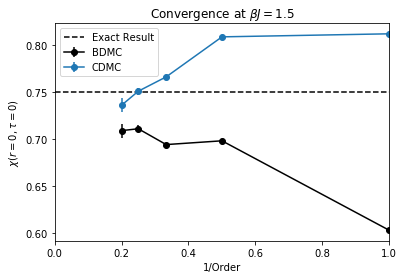

In [51]:
plt.figure()
plt.errorbar(1.0/Chi00_DMC[beta][:,0], Chi00_DMC[beta][:, 1], yerr=Chi00_DMC[beta][:,2], c="k", label="BDMC",fmt='o-')
plt.errorbar(1.0/Chi00_CDMC[beta][:,0], Chi00_CDMC[beta][:, 1], yerr=Chi00_CDMC[beta][:,2], label="CDMC",fmt='o-')
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(r=0, \tau=0)$")
plt.title(r"Convergence at $\beta J = 1.5$")
plt.legend()

plt.savefig("triangular_Sum_Rule_Beta1.5.pdf")
plt.show()